# <p style="text-align: center;">EE 380L: Data Mining</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 75 </p>
## <p style="text-align: center;">Due: **10th September 2020(09/10/2020)** submitted via Canvas by 11:59 pm</p>
## <p style="text-align: center;">SUBMITTED BY Nisha Kumaraswamy (NK3528) and David Villarreal (DLV554) on Sep 10, 2020


Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UT eID for both students.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)*

For the descriptive questions, you can write down the solution in paper and embed a picture of it to the notebook or type it out.

# Question 1: Challenges in Data Science (10 pts)

Refer to the Domino guide under Modules --> Additional Resources

Section 2 describes 8 Challenges. You may have personally encountered or heard of somebody else who encountered some of these challenge. If so, please write 1-2 paragraphs on what situation was encountered and how it mapped into one the mentioned challenges. If not, think of a hypothetical case and do the same exercise.

#### Question 1 answers
_One example of the problem of a constantly changing world I can think of occurs in the Integrated circuits community. 
There are models that are created to predict manufacturing and realibility issues, based on a design layout. A problem
occurs when a company might update their layout design methodology, producing data that a model wasn't trained to
observe. A model is technically not trained to make a prediction based on this data, but the user of the model might
be unaware._

_Another thing I found highly relevant in the article is about having the wrong tools, which also happens in the
integrated circuits world. Every company has an IT team, and you need their permission to install packages. You might
have a great idea on how to implement a new model, but IT won't let you use too many CPUs, or a GPU, or might complain
about your usage of memory. Sometimes, you are simply not allowed to use the best tools for your project, and this 
slows down your project, having to recur to what the article mentions as "coffee breaks"_ 

# Question 2: Guess the coin (5+5 points)


Assume we are playing a guessing game with a friend. The friend has three coins at hand:
* **Coin A**: a fair coin with equal probability of being head (H ) or tail (T)
* **Coin B**: a biased coin with a probability of 0.75 being head (H)
* **Coin C**: a coin with a probability of $P^*(H)$ being head (H)

The friend secretly picked one of the coins, randomly flipped it a few times, and get a sequence of *HTHHTT* (all of which come from the same coin he picked). 

1. If you had to choose between whether **Coin A** or **Coin B** was used, and you prefer the one which is more likely, which one will you choose?  (5 points)
2. What would be the value of  $P^*(H)$ such that **Coin C** corresponds to the most likely (among infinite possible coins) coin to have produced the observed sequence?(i.e. provide  an analytical derivation for $P^*(H)$ using maximum likelihood estimation (MLE))."

#### Question 2 answers

1. In order to perform an inference on which coin (fair or biased) the friend used, we need to define a likelihood. Here we start by defining our unknown parameter theta, and this is either the coin used in the flips were fair or biased. The given data is from 6 coin flips and we have 4 heads from these 6 flips i.e., binomial of the 6 coin flips. Our binomial density function is given by and the tool we use will be our likelihood function. We will conclude that the coin being used is the onet with the greater likelihood value for the function. 

$f(x|n,p)=\frac{n!}{x!*(n-x)!}*p^x*(1-p)^{(n-x)} $ where x=0,1,...n

Therefore the likelihood based on the binomial density kernel is given by:

$L(\theta|x=3,n=6,faircoin)=Bin(n,p)$ where n=6 and p=0.5

$ L(\theta|x=4,n=6,faircoin)=
\left( \begin{array}{c} 6 \\ 3 \end{array} \right) * (0.5)^3*(0.5)^3
$

$ L(\theta|x=3,n=6,faircoin)=
0.3125
$

$L(\theta|x=3,n=6,biasedcoin)=Bin(n,p)$ where n=6 and p=0.75

$ L(\theta|x=3,n=6,loadedcoin)=
\left( \begin{array}{c} 6 \\ 3 \end{array} \right) * (0.75)^3*(0.25)^3
$

$ L(\theta|x=4,n=6,loadedcoin)=
0.1318
$

In [1]:
from scipy.stats import binom
binom.pmf(3, 6, 0.5) # Fair coin likelihood

0.3125000000000002

In [2]:
binom.pmf(3, 6, 0.75) # Biased coin likelihood

0.13183593750000008

So we see that having observed 3 heads, the likelihood is higher for theta equals fair than for theta equals loaded. Thus, we can say the maximum likelihood estimate, theta hat, is that this is a fair coin.

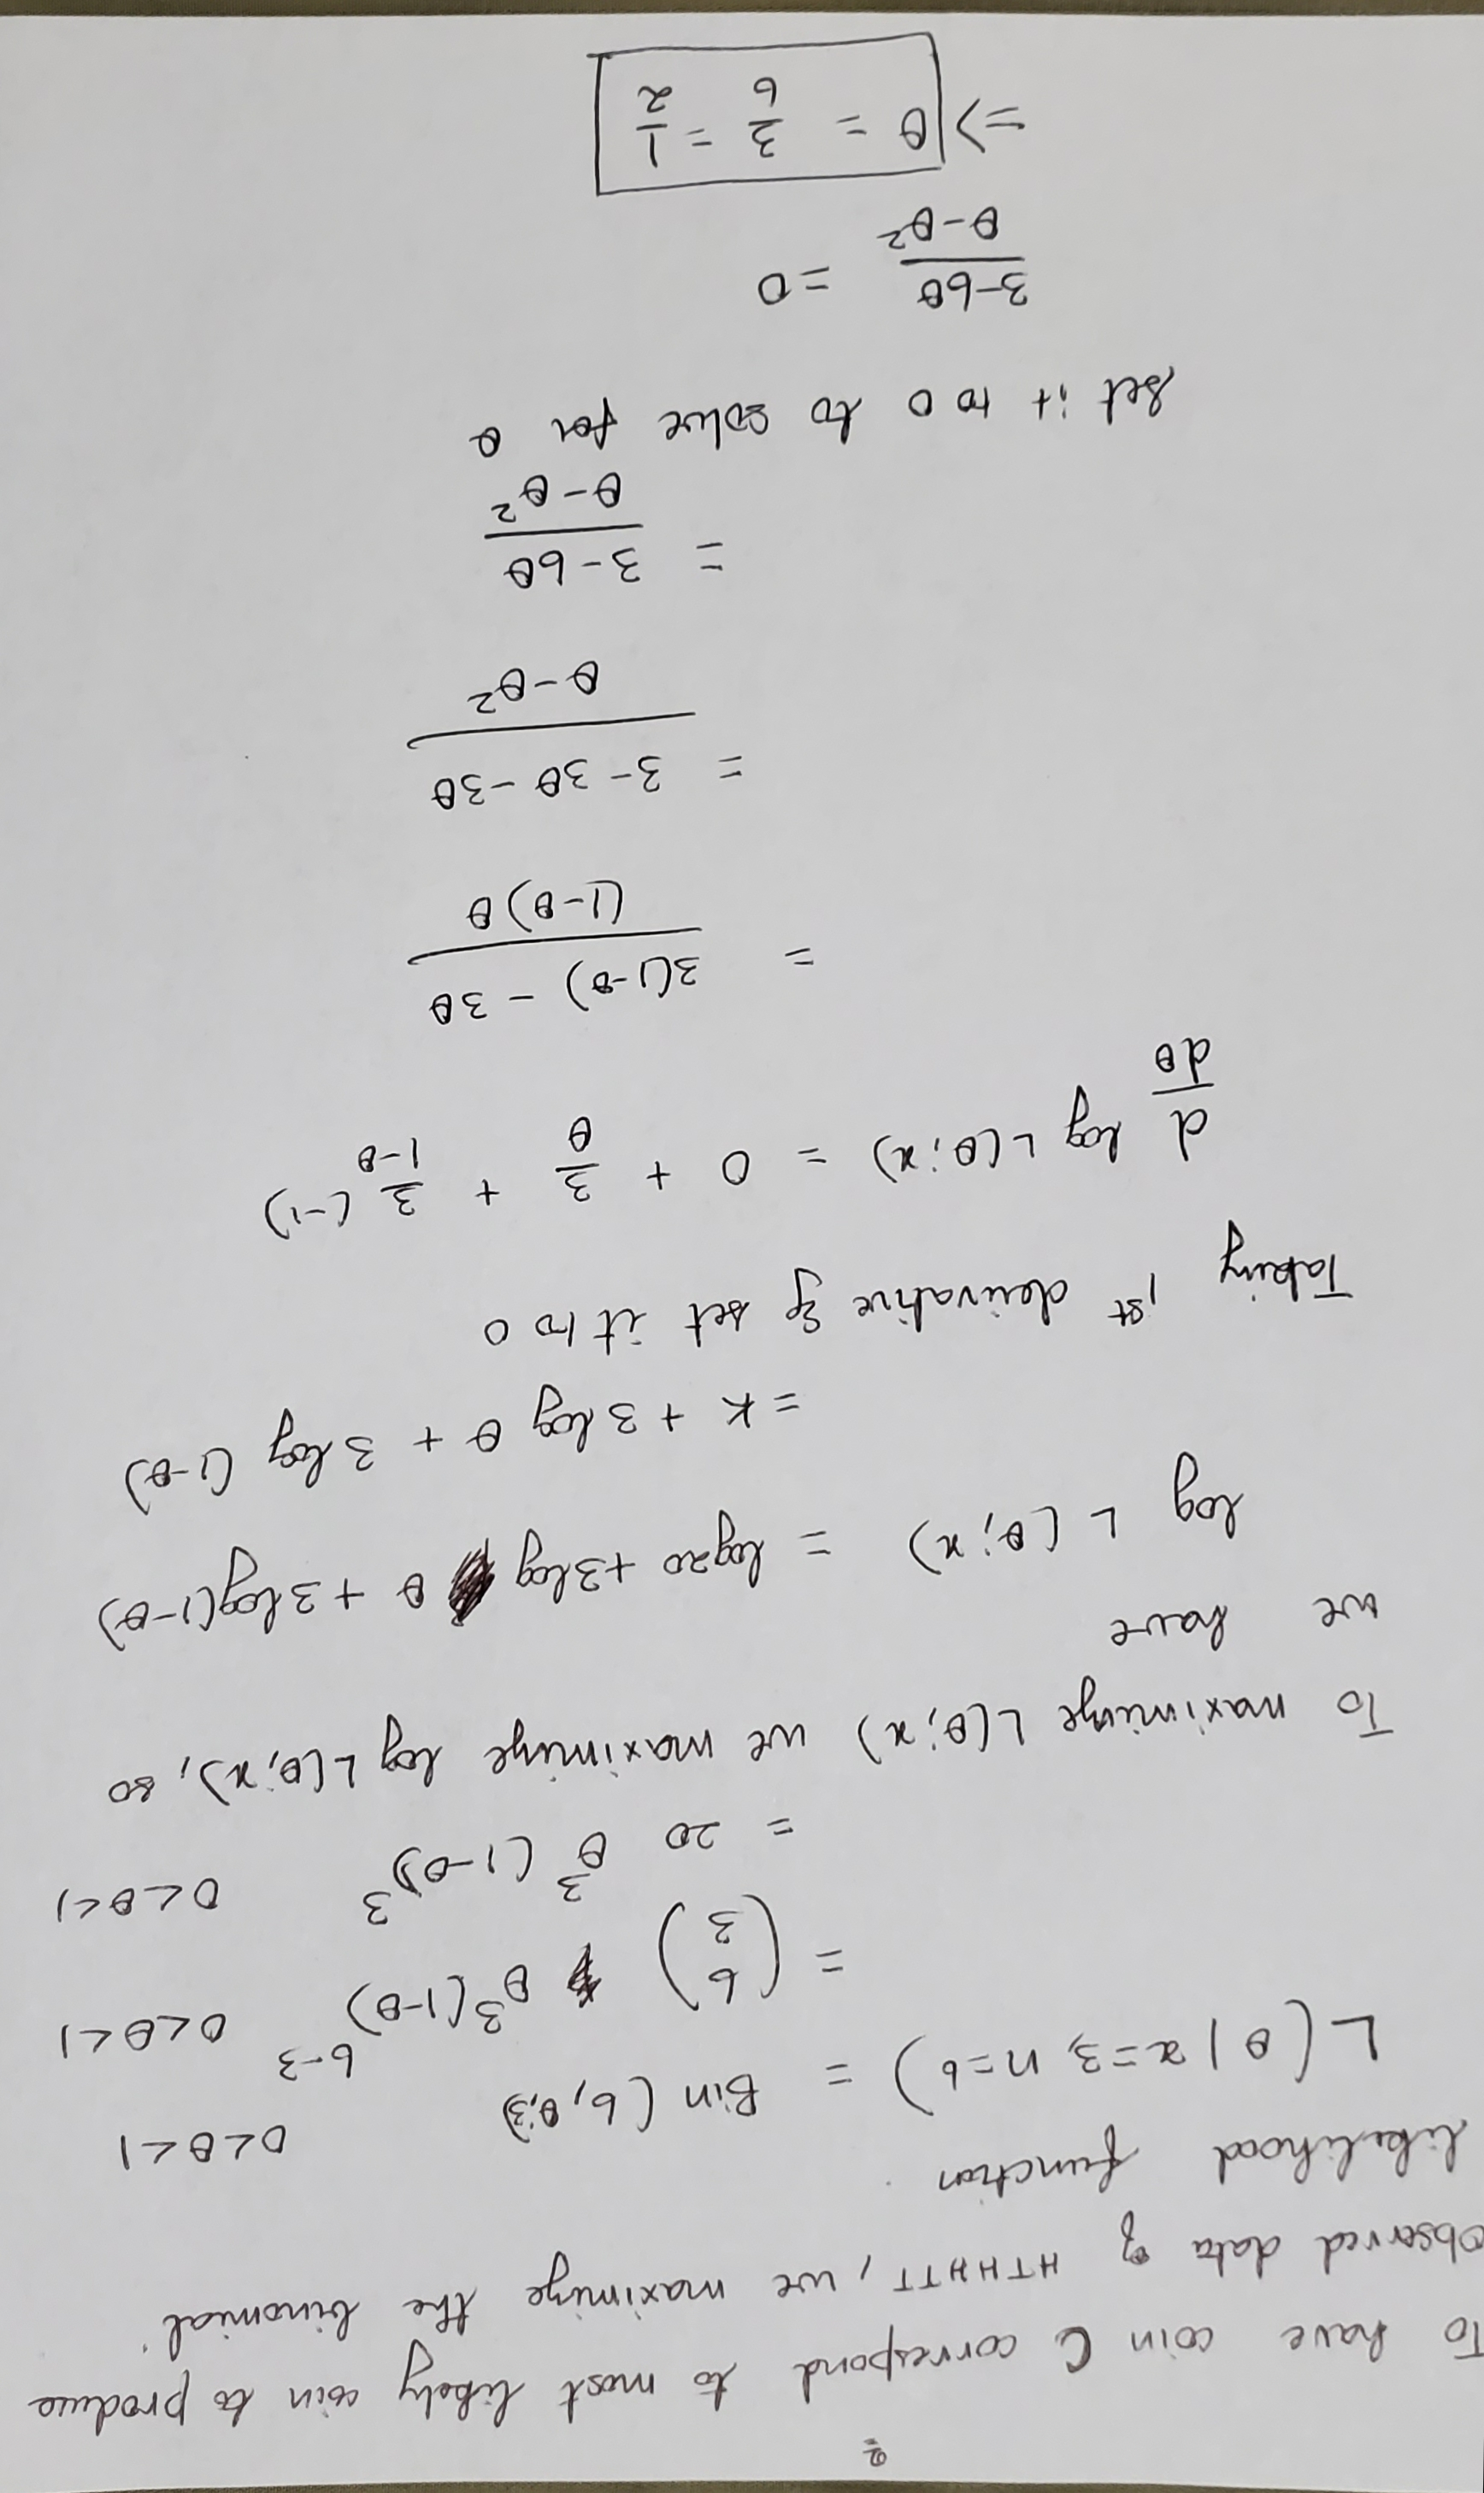

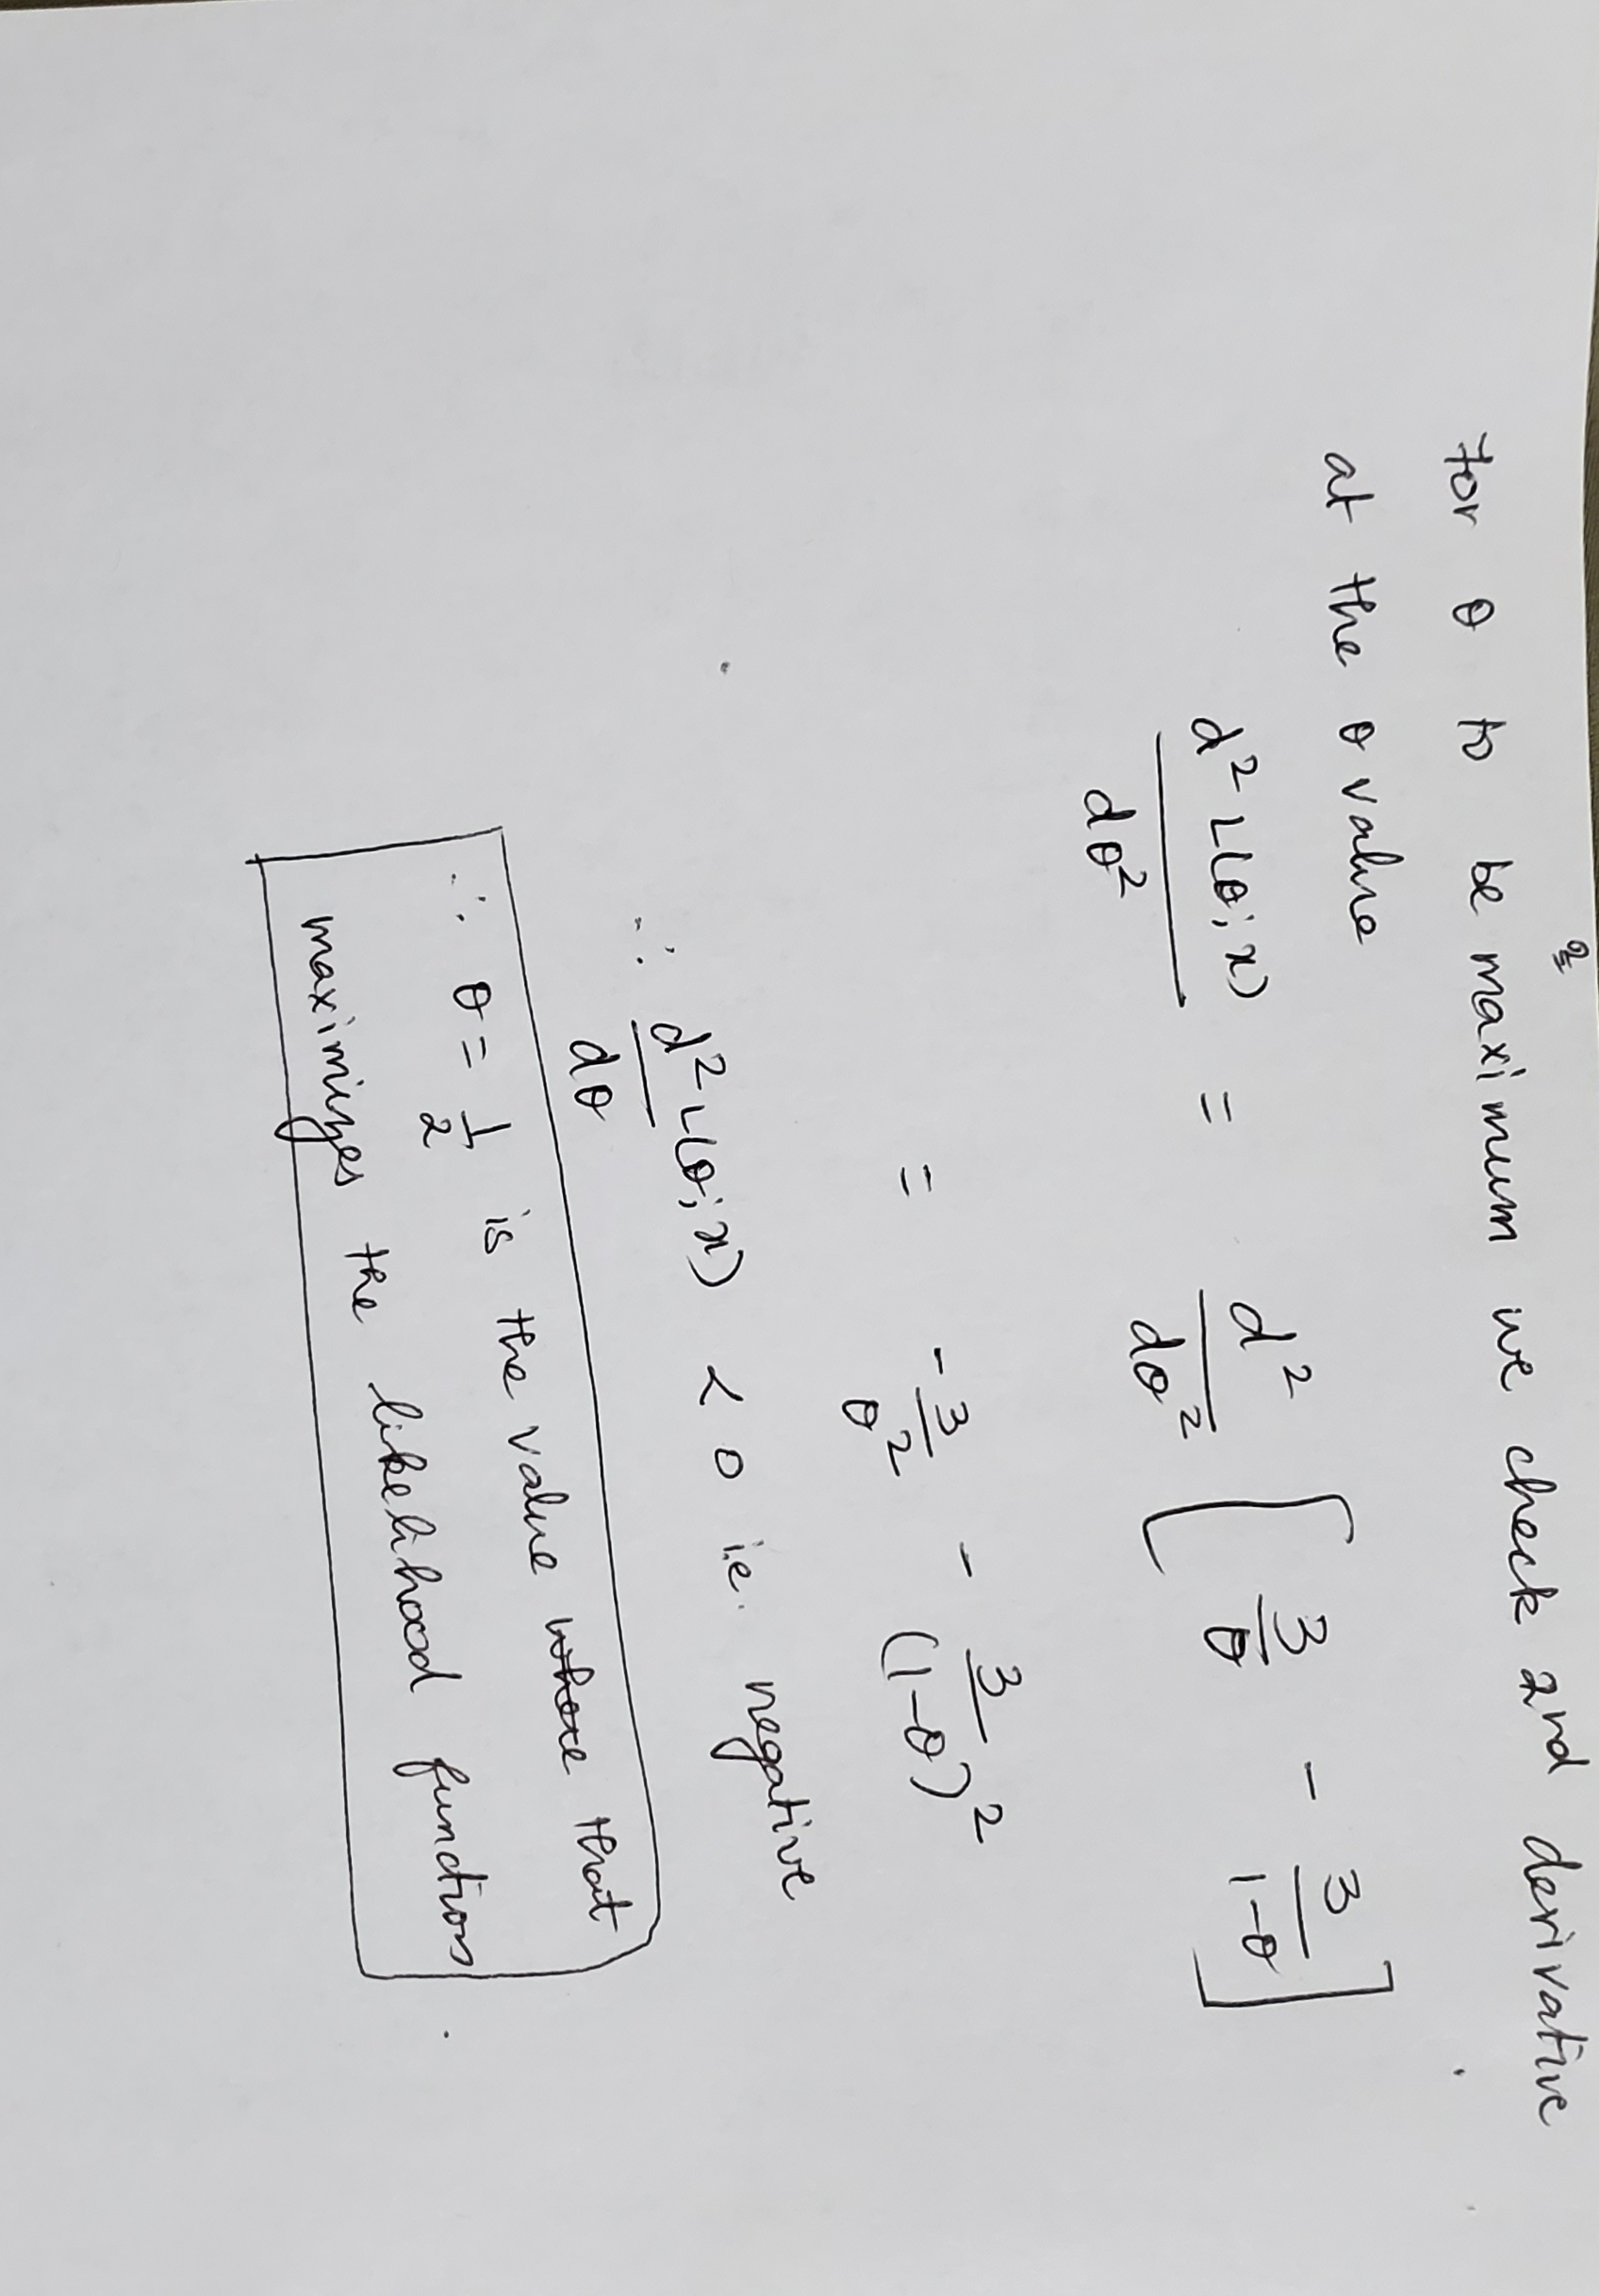

At the given theta = 0.5, we see that the 2nd derivative is always negative!

# Question 3: Bivariate Normal Distribution (20 pts)

Suppose $X$ and $Y$ are two random variables whose joint distribution is Normal (Gaussian), centered at (0,0) and with correlation $\rho$. (See "Bivariate Case" in the Wikipedia entry for "Multivariate Normal Distribution" for the equation, or use just use the vector form given in the class notes, with $\sigma_{12} = \sigma_{21} = \rho \sigma_{x} \sigma_{y} $). Consider 2 cases:
1. $\sigma_x^2 = 16; \sigma_y^2 = 9; \rho = 0$
2. $\sigma_x^2 = 16; \sigma_y^2 = 9; \rho = 0.5$

Sample 20000 points to obtain the contour plots for both the  cases.

a. (4 pts) Obtain contour plots for each of the two distributions using  Python (https://seaborn.pydata.org/generated/seaborn.kdeplot.html). 

b. (6 pts) View 3-D plots for the two distributions from at least two different viewing perspectives each (http://matplotlib.org/examples/mplot3d/rotate_axes3d_demo.html).

c.  (8 pts) Consider the bivariate Normal Distribution given in part (ii). We can rotate this distribution by using the rotation matrix
\begin{equation} \left[ \begin{array}{cc} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{array} \right] \end{equation}
Check Wikipedia for more info on rotation matrices. This is the same as creating two new random variables:
\begin{aligned}
U = X \cos(\theta) - Y \sin(\theta) \\
V = X \sin(\theta) + Y \cos(\theta)
\end{aligned}
For a rotation of -45 degrees, plot the rotated distribution and fit a bivariate gaussian to this rotated distribution.



#### Question 3 answers
#### Bivariate normal distribution
###### Declare mean and covariance matrix to draw samples for both cases wher rho=0 and rho=0.5

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
mean1, cov1 = [0, 0], [(16, 0), (0, 9)]
mean2, cov2 = [0, 0], [(16, .5*np.sqrt(16)*np.sqrt(9)), (.5*np.sqrt(16)*np.sqrt(9), 9)]

sns.set(color_codes=True)
x1,y1 = np.random.multivariate_normal(mean1, cov1, 20000).T #Case 1
x2,y2 = np.random.multivariate_normal(mean2, cov2, 20000).T #Case 2

#### 3.a. Contour plots

Text(0.5, 1.0, 'Case 1 contour plot')

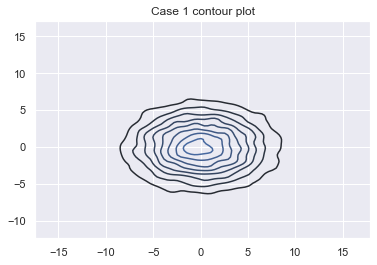

In [4]:
sns.kdeplot(x1, y1).set_title('Case 1 contour plot') #Case 1

Text(0.5, 1.0, 'Case 2 contour plot')

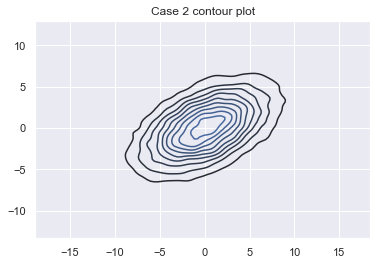

In [5]:
sns.kdeplot(x2, y2).set_title('Case 2 contour plot') #Case 2

#### 3.b. 3-D Plots viewed in angles 0 and 60 degrees

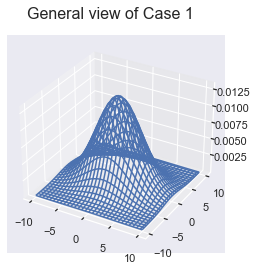

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

x, y = np.mgrid[-10.0:10.0:60j, -10.0:10.0:60j] # Case 1

# Need an (N, 2) array of (x, y) pairs.
xy = np.column_stack([x.flat, y.flat])

z = multivariate_normal.pdf(xy, mean=mean1, cov=cov1)

# Reshape back to a (60, 60) grid.
z = z.reshape(x.shape)

fig = plt.figure()
fig.suptitle('General view of Case 1', fontsize=16)
ax = fig.add_subplot(111, projection='3d')

#ax.plot_surface(x,y,z)
ax.plot_wireframe(x,y,z)

plt.show()

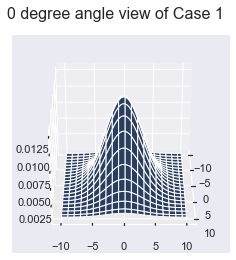

In [7]:
fig = plt.figure()
fig.suptitle('0 degree angle view of Case 1', fontsize=16)
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z, rstride=3, cstride=3)
ax.view_init(30, 0) # 0 degree angle

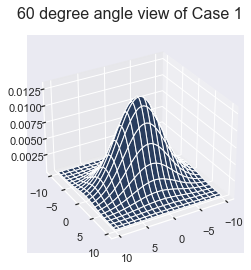

In [8]:
fig = plt.figure()
fig.suptitle('60 degree angle view of Case 1', fontsize=16)

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z, rstride=3, cstride=3)
ax.view_init(30, 60) # 60 degree angle

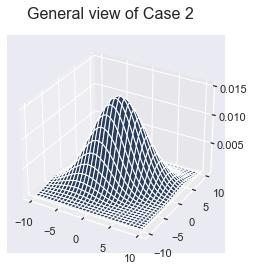

In [9]:
x, y = np.mgrid[-10.0:10.0:60j, -10.0:10.0:60j] # Case 2

# Need an (N, 2) array of (x, y) pairs.
xy = np.column_stack([x.flat, y.flat])

z = multivariate_normal.pdf(xy, mean=mean2, cov=cov2)

# Reshape back to a (60, 60) grid.
z = z.reshape(x.shape)

fig = plt.figure()
fig.suptitle('General view of Case 2', fontsize=16)
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x,y,z)
#ax.plot_wireframe(x,y,z)

plt.show()

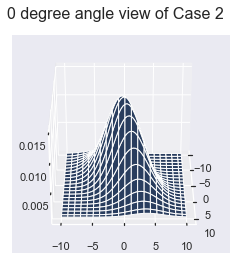

In [10]:
fig = plt.figure()
fig.suptitle('0 degree angle view of Case 2', fontsize=16)
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z, rstride=3, cstride=3)
ax.view_init(30, 0) # 0 degree angle

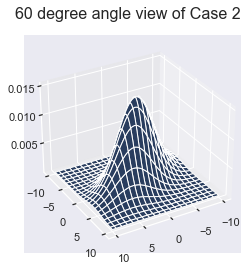

In [11]:
fig = plt.figure()
fig.suptitle('60 degree angle view of Case 2', fontsize=16)
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z, rstride=3, cstride=3)
ax.view_init(30, 60) # 60 degree angle

#### 3.c. Bivariate normal distribution rotated using the rotation matrix

In [12]:
import math  
theta=-45
s_theta=math.sin(math.radians(theta))
c_theta=math.cos(math.radians(theta))

R = [[c_theta,-s_theta],[s_theta,c_theta]] # rotation matrix declaration

In [13]:
df1=pd.DataFrame({'x1':x1,'y1':y1}) # Case 1
df2=pd.DataFrame({'x2':x2,'y2':y2}) # Case 2

R_Matrix1=np.dot(R,np.transpose(df1)) # Case 1
R_Matrix2=np.dot(R,np.transpose(df2)) # Case 2

Rdf1=pd.DataFrame({'Rx1':R_Matrix1.T[:,0],'Ry1':R_Matrix1.T[:,1]}) # Case 1
Rdf2=pd.DataFrame({'Rx2':R_Matrix2.T[:,0],'Ry2':R_Matrix2.T[:,1]}) # Case 2

In [14]:
Rmean1=Rdf1.mean(axis=0) # Mean of rotated matrix case 1
Rmean2=Rdf2.mean(axis=0) # Mean of rotated matrix case 2

Rcov1=Rdf1.cov() # Covariance matrix case 1
Rcov2=Rdf2.cov() # Covariance matrix case 2

Rcorr1=Rdf1.corr() # Correlation rho for case 1
Rcorr2=Rdf2.corr() # Correlation rho for case 2

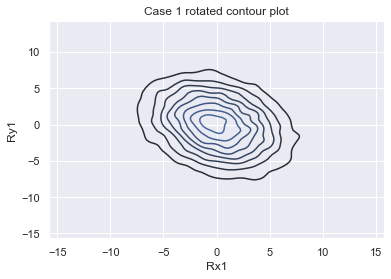

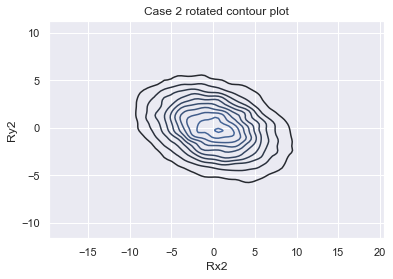

In [15]:
sns.kdeplot(Rdf1['Rx1'], Rdf1['Ry1']).set_title('Case 1 rotated contour plot') # Case 1
plt.show()
sns.kdeplot(Rdf2['Rx2'], Rdf2['Ry2']).set_title('Case 2 rotated contour plot') # Case 2
plt.show()

<Figure size 432x288 with 0 Axes>

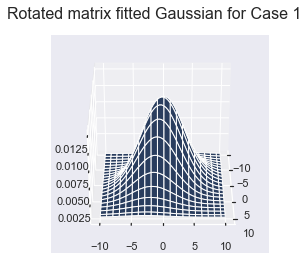

In [16]:
x, y = np.mgrid[-10.0:10.0:60j, -10.0:10.0:60j] # Case 1

# Need an (N, 2) array of (x, y) pairs.
xy = np.column_stack([x.flat, y.flat])

z = multivariate_normal.pdf(xy, mean=Rmean1, cov=Rcov1)

# Reshape back to a (60, 60) grid.
z = z.reshape(x.shape)

fig = plt.figure()

plt.show()
fig = plt.figure()
fig.suptitle('Rotated matrix fitted Gaussian for Case 1', fontsize=16)
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z, rstride=3, cstride=3)
ax.view_init(30, 0) # 0 degree angle

<Figure size 432x288 with 0 Axes>

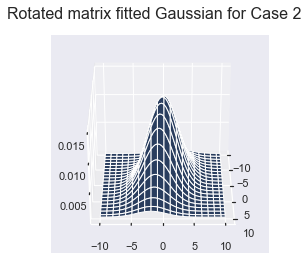

In [17]:
x, y = np.mgrid[-10.0:10.0:60j, -10.0:10.0:60j] # Case 2

# Need an (N, 2) array of (x, y) pairs.
xy = np.column_stack([x.flat, y.flat])

z = multivariate_normal.pdf(xy, mean=Rmean2, cov=Rcov2)

# Reshape back to a (60, 60) grid.
z = z.reshape(x.shape)

fig = plt.figure()

plt.show()
fig = plt.figure()
fig.suptitle('Rotated matrix fitted Gaussian for Case 2', fontsize=16)
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z, rstride=3, cstride=3)
ax.view_init(30, 0) # 0 degree angle

# Question 4 (5 pts)
(i)What are the key assumptions regarding the relation between the dependent variable (Y) and the
independent variables (Xs) made in the standard (multiple) linear regression model?

(ii) Briefly describe how the residuals obtained from an MLR solution can be used to test some
assumption(s) made by this model.


###### Question 4 answers
(i)   It assumes that (1) there is a linear relationship between the input features and the output. (2) It assumes that the residuals are normally distributed. (3) It assumes there is no multicollinearity which means that the input features are independent of each other and not correlated. (4) It assumes Homoscedasticity, which means that the model the residuals have constant variance across the values of the independent variables.


(ii) A scatter plot of residuals to fitted Y should not form any specific pattern. This tests for linearity assumption we make      in MLR. Plotting the residuals against time or in some other type of sequence will let us know if there is any correlation      between error terms that are near each other in the sequence. This plot can help check for the independence of the error        terms.

# Question 5: Multiple Linear Regression (30 pts + 5 pts bonus)

Use the following code to import the Fish market prices dataset in python. The dataset is taken from https://www.kaggle.com/aungpyaeap/fish-market.

1. Species: Species name of fish
2. Weight: Weight of fish in gram
3. Length1: Vertical length in cm
4. Length2: Diagonal length in cm
5. Length3: Cross length in cm
6. Height: Height in cm
7. Width: Diagonal width in cm



In [18]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None


df = pd.read_csv('data.csv',index_col=0)
df = df.fillna(0)

X = df.drop(['Weight'], axis=1)
y = df['Weight']


Consider the `Weight` column to be your target variable. You can ignore the species of the Fish for this regression problem(a to f).

a. (2 pts)  Print the shape (number of rows and columns) of the feature matrix X, and print the first 5 rows.

b. (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset. Report the regression coefficient of each input feature and evaluate the model using mean absolute error (MAE). Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c. (6 pts) Split the data into a training set and a test set, using the train_test_split with test_size = 0.25 and random_state = 50. Fit an MLR using the training set. Evaluate the trained model using the training set and the test set, respectively. Compare the two MAE values thus obtained. Report the $R^2$ value(coefficient of determination)(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) .

d. (5 pts) Calculate the pearson correlation matrix of the independent variables in the training set. Report the variables which have magnitude of correlation greater than 0.8 w.r.t the variable 'Length2'. Now, plot a pairplot based on Species column as seen in the 2nd plot [here](https://seaborn.pydata.org/generated/seaborn.pairplot.html). How does the pairplot validate your previous answer?

e. (6 pts) Plot the histogram of Y_train and see its distribution. Now take log of Y_train and plot its histogram. Now run regression again after taking log and compare the MAE. You need to do np.exp(predictions) to bring them back to original scale, and then calculate MAE and $R^2$. Explain the results.

f. (5 pts) Rank the features in descending order based on their significance. You might find this link to be helpful: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html.

g. (Bonus question - 5 pts) Use the Species column for one-hot encoding and perform part c of this question. Explain your results.

#### Question 5 answers

In [19]:
X.info()
X.describe()
X.shape # 5.a. Shape of feature matrix

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, Bream to Smelt
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Length1  159 non-null    float64
 1   Length2  159 non-null    float64
 2   Length3  159 non-null    float64
 3   Height   159 non-null    float64
 4   Width    159 non-null    float64
dtypes: float64(5)
memory usage: 7.5+ KB


(159, 5)

In [20]:
X.head(5) # 5.a. First 5 rows of feature matrix

Length1  Length2  Length3   Height   Width
Species                                            
Bream       23.2     25.4     30.0  11.5200  4.0200
Bream       24.0     26.3     31.2  12.4800  4.3056
Bream       23.9     26.5     31.1  12.3778  4.6961
Bream       26.3     29.0     33.5  12.7300  4.4555
Bream       26.5     29.0     34.0  12.4440  5.1340

In [21]:
from sklearn.linear_model import LinearRegression #5.b. MLR on all the data
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [22]:
reg.coef_
coeff_df = pd.DataFrame(reg.coef_,X.columns,columns=['Coefficient'])
coeff_df #5.b. Regression coefficient of each input feature

Coefficient
Length1    62.355214
Length2    -6.526752
Length3   -29.026219
Height     28.297351
Width      22.473307

In [23]:
predictions = reg.predict(X) # Predictions from the MLR model fit we have with whole data
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y, predictions))

MAE: 91.78724088307948


###### 5.c. Split data into training and test

In [24]:
from sklearn.model_selection import train_test_split #5.c. Data splitting to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
reg.fit(X_train,y_train)
# print the intercept
print('Intercept:',reg.intercept_)
coeff_df = pd.DataFrame(reg.coef_,X.columns,columns=['Coefficient'])
coeff_df

Intercept: -533.0063178279211


Coefficient
Length1    52.469000
Length2    -0.629126
Length3   -26.738983
Height     27.975250
Width      32.993888

In [25]:
Trnpredictions = reg.predict(X_train) # Predictions from the MLR model fit we have with train data
from sklearn import metrics
print('MAE for training dataset:', metrics.mean_absolute_error(y_train, Trnpredictions))


MAE for training dataset: 84.82479753198542


In [26]:
Tstpredictions = reg.predict(X_test) # Predictions from the MLR model fit we have with test data
from sklearn import metrics
print('MAE for testing dataset:', metrics.mean_absolute_error(y_test, Tstpredictions))


MAE for testing dataset: 101.89481945056988


In [27]:
from sklearn.metrics import r2_score

print('r^2 for training dataset: ',r2_score(y_train, Trnpredictions)) # R squared on train data

r^2 for training dataset:  0.878916337517605


In [28]:
print('r^2 for testing dataset: ',r2_score(y_test, Tstpredictions))  # R squared on test data

r^2 for testing dataset:  0.8919608385022908


###### 5.d. Answers
Length1, Length3 and Width have a correlation of greater than 0.8 w.r.t the variable 'Length2'

In [29]:
print(X_train.corr(method='pearson')) #5d. Pearson correlation matrix of training dataset
print('Length1, Length3 and Width have a correlation of greater than 0.8 w.r.t the variable Length2')

          Length1   Length2   Length3    Height     Width
Length1  1.000000  0.999399  0.990034  0.587997  0.845798
Length2  0.999399  1.000000  0.992702  0.606298  0.853645
Length3  0.990034  0.992702  1.000000  0.678908  0.858384
Height   0.587997  0.606298  0.678908  1.000000  0.766986
Width    0.845798  0.853645  0.858384  0.766986  1.000000
Length1, Length3 and Width have a correlation of greater than 0.8 w.r.t the variable Length2


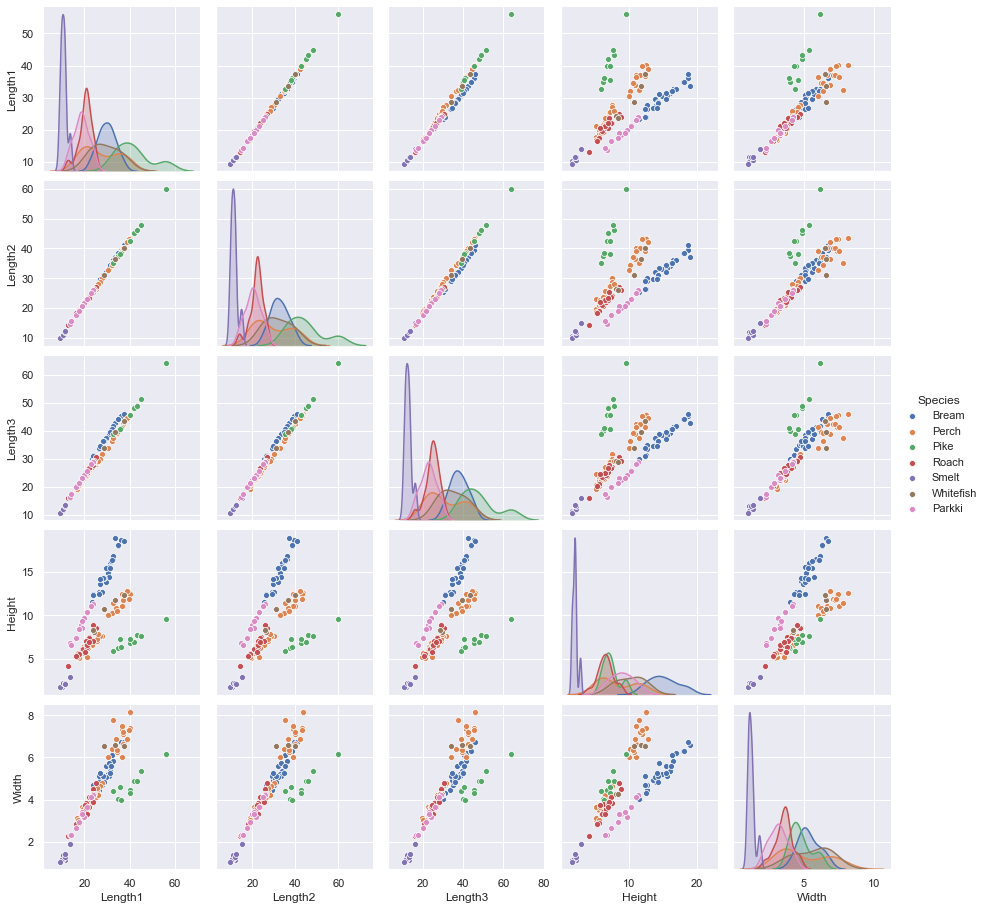

In [30]:
HuePlot=X_train.reset_index()
sns.pairplot(HuePlot, hue='Species') #5d. Pair plot of training dataset
# The pairplots validates our correlation matrix answer as well as we can see from the plots of length1 Vs Length2 
# and Length3 Vs Length2 and Width Vs Length2.

The pairplots validates our correlation matrix answer as well as we can see from the plots of length1 Vs Length2 
and Length3 Vs Length2 and Width Vs Length2.

<AxesSubplot:xlabel='Weight'>

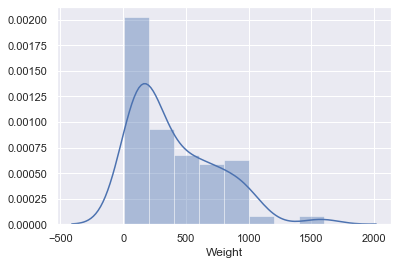

In [31]:
sns.distplot(y_train)

<AxesSubplot:xlabel='Weight'>

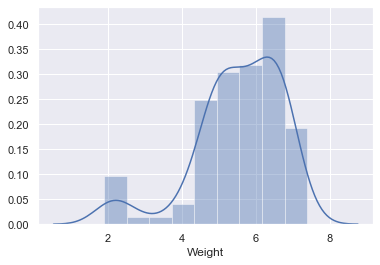

In [32]:
ly_train=np.log(y_train)
sns.distplot(ly_train)

In [33]:
from sklearn.model_selection import train_test_split #5.e. Data splitting to train and test
lX_train = np.log(X_train) 
reg.fit(lX_train,ly_train)
# print the intercept
print('Intercept:',reg.intercept_)
coeff_df = pd.DataFrame(reg.coef_,X.columns,columns=['Coefficient'])
coeff_df

Intercept: -1.9301824480384973


Coefficient
Length1     0.358834
Length2     1.349974
Length3    -0.223219
Height      0.610581
Width       0.914453

In [34]:
Trnpredictions = reg.predict(lX_train) # Predictions from the MLR model fit we have with train data
ExpTrnpredictions=np.exp(Trnpredictions)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_train, ExpTrnpredictions))

from sklearn.metrics import r2_score

print('R^2: ',r2_score(y_train, ExpTrnpredictions)) # R squared on train data

MAE: 30.081391871409714
R^2:  0.9680909649893132


OLS regression of the original variable y_train is used to to estimate the expected arithmetic mean. Since we changed both inputs and outputs to a log scale, the MAE has decreased significantly and we also have a higher R^2 value for training data as well. This is probably because of the log transformations of both inputs and outputs leading to more valid MLR assumptions and giving us a higher R^2.

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression #5.f. MLR on all the data followed by feature ranking

X = df.drop(['Weight'], axis=1)
y = df['Weight']
reg = LinearRegression()
reg.fit(X,y)
selector = RFE(reg, n_features_to_select=3, step=1)
selector = selector.fit(X, y)
selector.support_
selector.ranking_

array([1, 3, 1, 1, 2])

In [36]:
 pd.DataFrame(selector.ranking_,X.columns,columns=['Ranking'])

Ranking
Length1        1
Length2        3
Length3        1
Height         1
Width          2

In [37]:
df = pd.read_csv('data.csv')
df = df.fillna(0)

X = df.drop(['Weight'], axis=1)
y = df['Weight']
#print(X['Species'])

# use pd.concat to join the new columns with your original dataframe
X = pd.concat([X,pd.get_dummies(X['Species'], prefix='Species',drop_first=True)],axis=1)

X.drop(['Species'],axis=1, inplace=True)


from sklearn.model_selection import train_test_split #5.c. Data splitting to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
reg.fit(X_train,y_train)
# print the intercept
print('Intercept:',reg.intercept_)
coeff_df = pd.DataFrame(reg.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)
Trnpredictions = reg.predict(X_train) # Predictions from the MLR model fit we have with train data
Tstpredictions = reg.predict(X_test)
from sklearn import metrics
print('MAE for training dataset:', metrics.mean_absolute_error(y_train, Trnpredictions))
print('MAE for test dataset:', metrics.mean_absolute_error(y_test, Tstpredictions))
from sklearn.metrics import r2_score
print('R^2 for training dataset',r2_score(y_train, Trnpredictions)) # R squared on train data
print('R^2 for testing dataset',r2_score(y_test, Tstpredictions)) # R squared on train data

Intercept: -995.0821793355565
                   Coefficient
Length1            -119.645718
Length2             134.460285
Length3              18.370705
Height                1.280846
Width                11.366068
Species_Parkki      188.111062
Species_Perch        65.684079
Species_Pike       -292.883015
Species_Roach       121.309696
Species_Smelt       505.558895
Species_Whitefish    72.900655
MAE for training dataset: 57.96404800546121
MAE for test dataset: 89.20532755690007
R^2 for training dataset 0.9463762188356688
R^2 for testing dataset 0.8885793687939455


Adding species has accounted for additional variance compared to not having the species as in part C, but only for the training dataset. The R^2 for the testing dataset hasn't really changed, which makes us believe that we have possibly overfitted our data, without adding predictive power.